In [1]:
from evaluation import get_prompt_list
classes = [ ("backpack", "backpack",0), ("backpack_dog", "backpack",1),
("bear_plushie", "stuffed animal",2), ("berry_bowl", "bowl",3), 
("can", "can",4), ("candle", "candle",5), 
("cat", "cat",6), ("cat2", "cat",7),
("clock", "clock", 8), ("colorful_sneaker", "sneaker",9),
("dog", "dog", 10), ("dog2", "dog", 11),
("dog3", "dog", 12), ("dog5", "dog", 13), ("dog6", "dog", 14),
("dog7", "dog", 15), ("dog8", "dog", 16),
("duck_toy", "toy", 17), ("fancy_boot", "boot", 18),
("grey_sloth_plushie", "stuffed animal", 19), ("monster_toy", "toy", 20),
("pink_sunglasses", "glasses", 21), ("poop_emoji", "toy", 22),
("rc_car", "toy", 23), ("red_cartoon", "cartoon", 24),
("robot_toy", "toy", 25), ("shiny_sneaker", "sneaker", 26),
("teapot", "teapot", 27), ("vase", "vase", 28),
("wolf_plushie", "stuffed animal", 29)]
name, prompt_class = classes[10]
unique_token = name+ "</w>"
class_token = prompt_class
mode_list = ["object", "live"]
eval_mode = mode_list[1]
prompt_list = get_prompt_list(unique_token, class_token, mode = eval_mode)
print(unique_token)
print(eval_mode)

backpack</w>
object


In [2]:
import sys
sys.path.append("../")
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch
from lora_diffusion import tune_lora_scale, patch_pipe
import open_clip
from PIL import Image
from disen_net import Image_adapter
import os
from visualization import joint_visualization
model_id = "/DATA/DATANAS1/zhangyip/models/stable-diffusion-2-1-base"

with torch.no_grad():
    pipe = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
    img_model, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14', pretrained='laion2b_s32b_b79k')
    img_model = img_model.to("cuda")
from evaluator import Evaluator
evalor = Evaluator("cuda:0", model_name='ViT-H-14', source="laion2b_s32b_b79k")
evalor1 = Evaluator("cuda:0", model_name='DINO', source="laion2b_s32b_b79k")

/home/chenhong/.conda/envs/diffusion/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Using cache found in /home/chenhong/.cache/torch/hub/facebookresearch_dino_main
/home/chenhong/.conda/envs/diffusion/lib/python3.10/site-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [3]:
dir_path = "./output_dreambooth/our_versions/" + name + "/global0.01disen0.001/checkpoint"
patch_pipe(
    pipe,
    os.path.join(dir_path, "lora_weight_e483_s2900.pt"),
    patch_text=False,
    patch_ti=False,
    patch_unet=True,
)
tune_lora_scale(pipe.unet, 1.0)
adapter = Image_adapter().to("cuda")
info = torch.load(os.path.join(dir_path, "lora_weight_e483_s2900.img_adapter.pt"))
adapter.load_state_dict(info)
ref_image = preprocess(Image.open( os.path.join("/DATA/DATANAS1/chenhong/diffusion_research/dreambooth_data", name, "02.jpg") )).unsqueeze(0).to("cuda")

LoRA : Patching Unet


a backpack</w> backpack is running under the starry sky with a light moon


  0%|          | 0/50 [00:00<?, ?it/s]

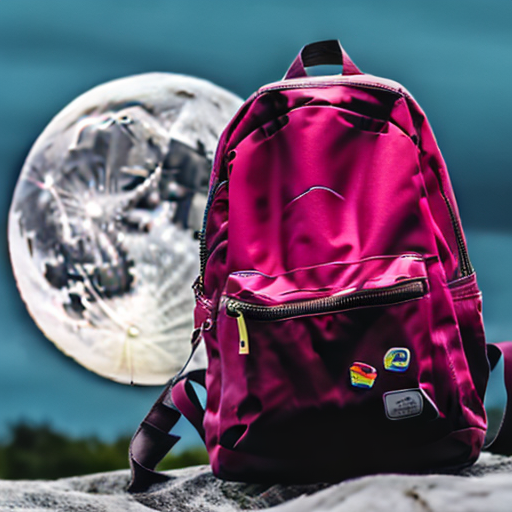

In [4]:
test_prompt = "a " + unique_token  +" "+ prompt_class + " is running under the starry sky with a light moon"
print(test_prompt)
image = joint_visualization(pipe, img_model, test_prompt, ref_image, guidance=7.0, eta=0.0, img_adapter=adapter, step=50, num_images_per_prompt = 1)[0]
image

## Generation for Dreambooth
First set a random seed, and then the template used in dreambooth will be generated

  0%|          | 0/50 [00:00<?, ?it/s]

0 a backpack</w> backpack in the jungle


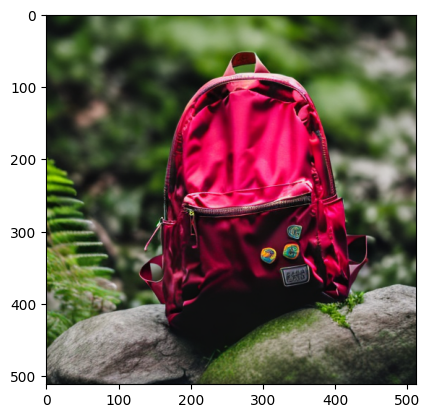

  0%|          | 0/50 [00:00<?, ?it/s]

1 a backpack</w> backpack in the snow


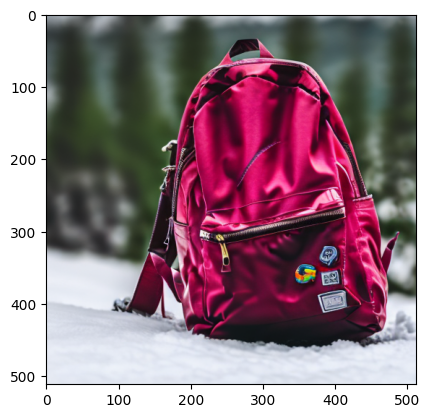

  0%|          | 0/50 [00:00<?, ?it/s]

2 a backpack</w> backpack on the beach


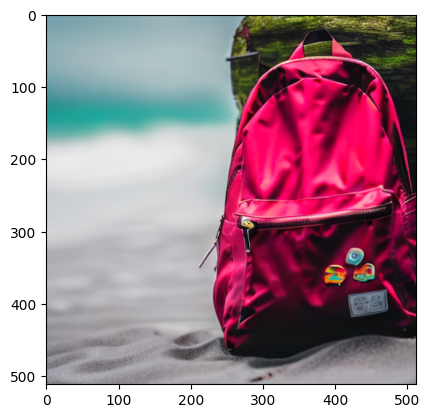

  0%|          | 0/50 [00:00<?, ?it/s]

3 a backpack</w> backpack on a cobblestone street


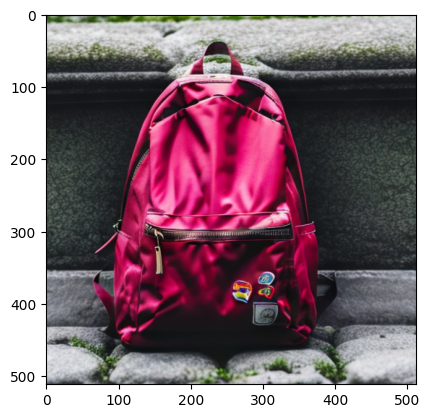

  0%|          | 0/50 [00:00<?, ?it/s]

4 a backpack</w> backpack on top of pink fabric


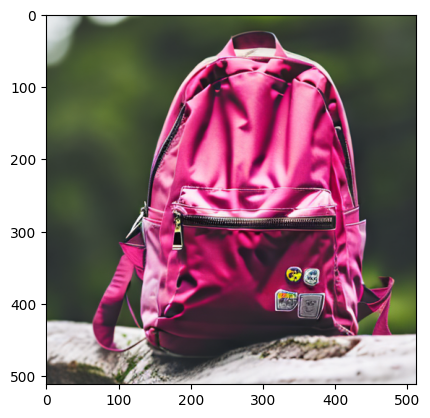

  0%|          | 0/50 [00:00<?, ?it/s]

5 a backpack</w> backpack on top of a wooden floor


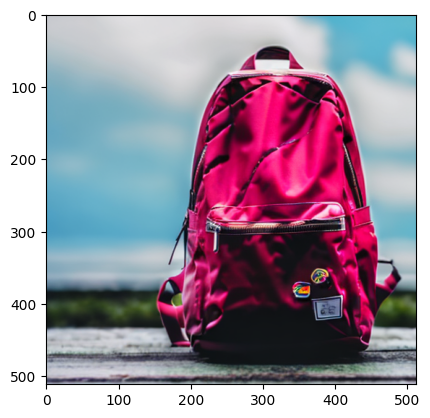

  0%|          | 0/50 [00:00<?, ?it/s]

6 a backpack</w> backpack with a city in the background


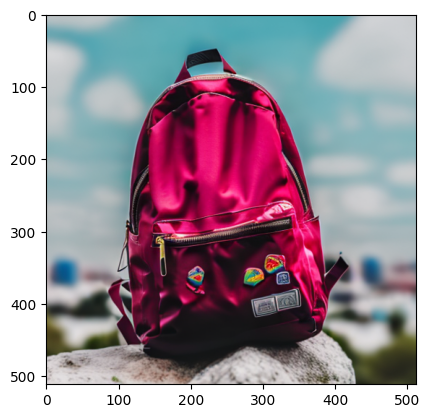

  0%|          | 0/50 [00:00<?, ?it/s]

7 a backpack</w> backpack with a mountain in the background


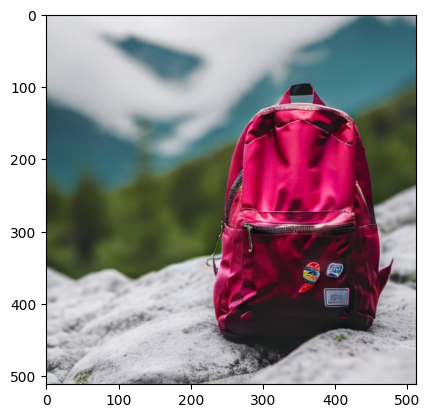

  0%|          | 0/50 [00:00<?, ?it/s]

8 a backpack</w> backpack with a blue house in the background


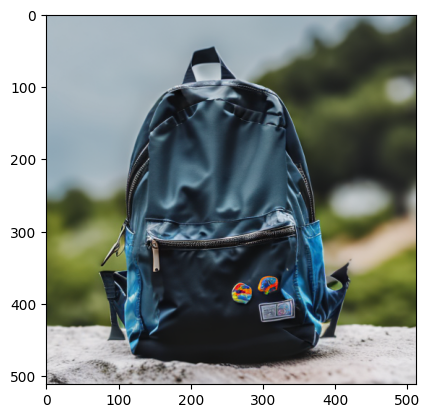

  0%|          | 0/50 [00:00<?, ?it/s]

9 a backpack</w> backpack on top of a purple rug in a forest


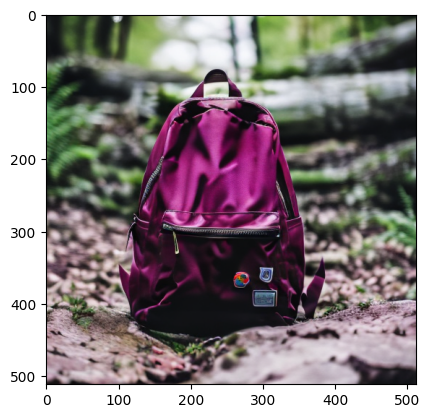

  0%|          | 0/50 [00:00<?, ?it/s]

10 a backpack</w> backpack with a wheat field in the background


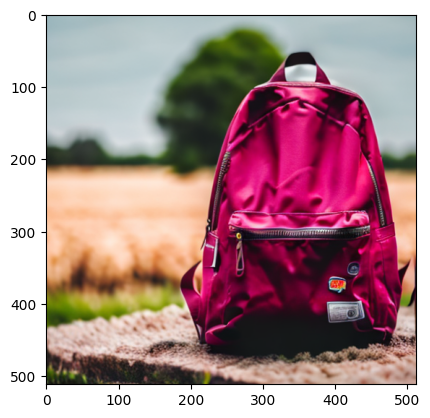

  0%|          | 0/50 [00:00<?, ?it/s]

11 a backpack</w> backpack with a tree and autumn leaves in the background


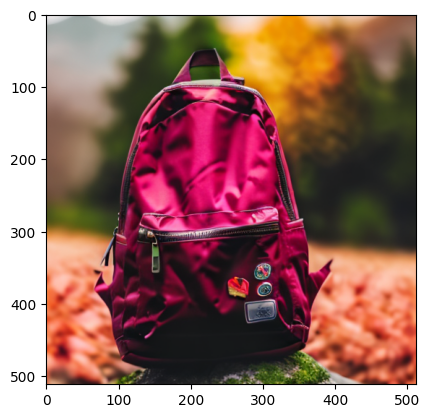

  0%|          | 0/50 [00:00<?, ?it/s]

12 a backpack</w> backpack with the Eiffel Tower in the background


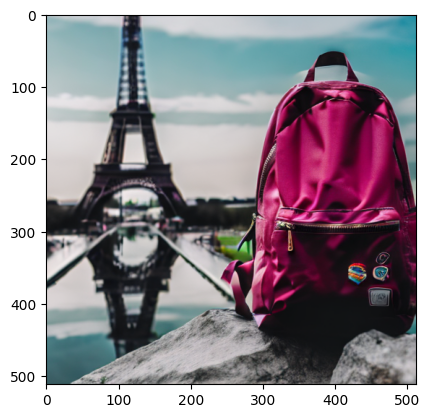

  0%|          | 0/50 [00:00<?, ?it/s]

13 a backpack</w> backpack floating on top of water


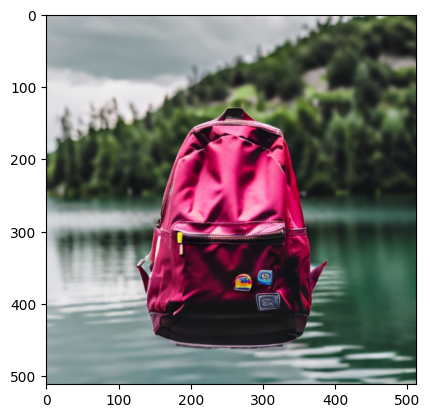

  0%|          | 0/50 [00:00<?, ?it/s]

14 a backpack</w> backpack floating in an ocean of milk


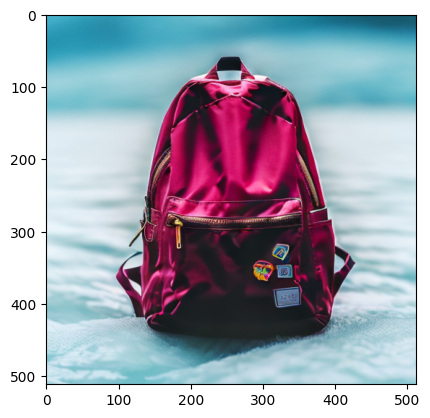

  0%|          | 0/50 [00:00<?, ?it/s]

15 a backpack</w> backpack on top of green grass with sunflowers around it


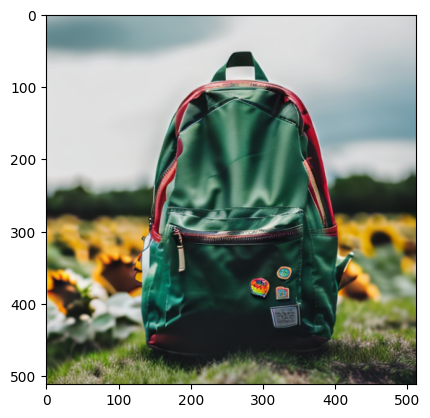

  0%|          | 0/50 [00:00<?, ?it/s]

16 a backpack</w> backpack on top of a mirror


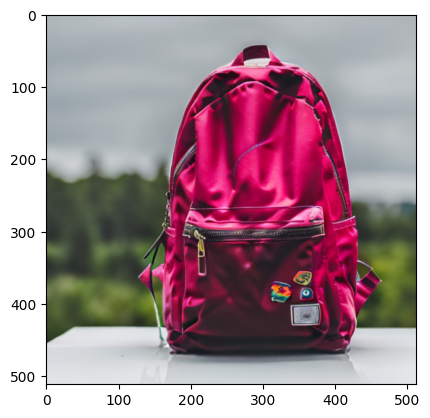

  0%|          | 0/50 [00:00<?, ?it/s]

17 a backpack</w> backpack on top of the sidewalk in a crowded street


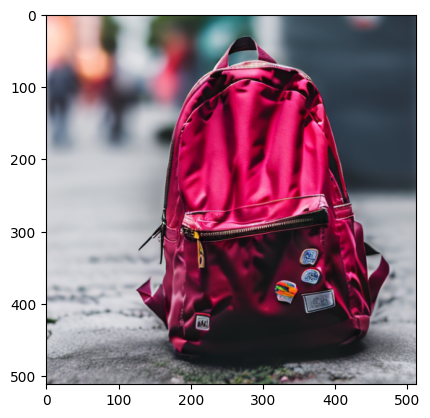

  0%|          | 0/50 [00:00<?, ?it/s]

18 a backpack</w> backpack on top of a dirt road


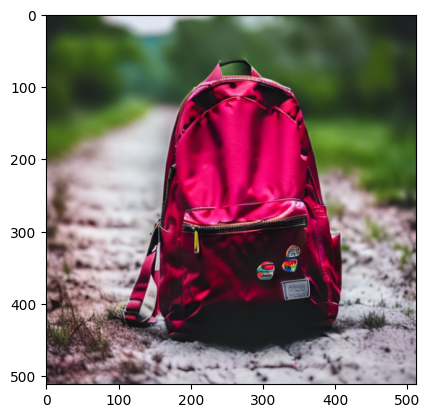

  0%|          | 0/50 [00:00<?, ?it/s]

19 a backpack</w> backpack on top of a white rug


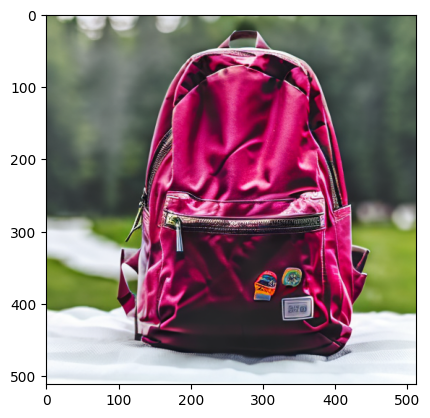

  0%|          | 0/50 [00:00<?, ?it/s]

20 a red backpack</w> backpack


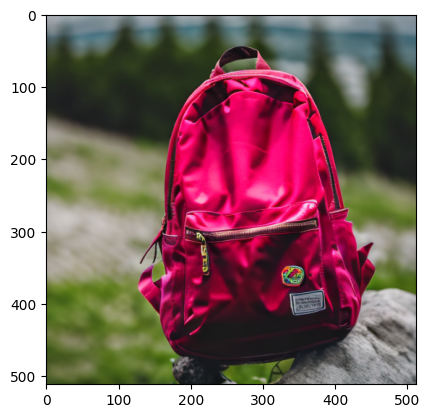

  0%|          | 0/50 [00:00<?, ?it/s]

21 a purple backpack</w> backpack


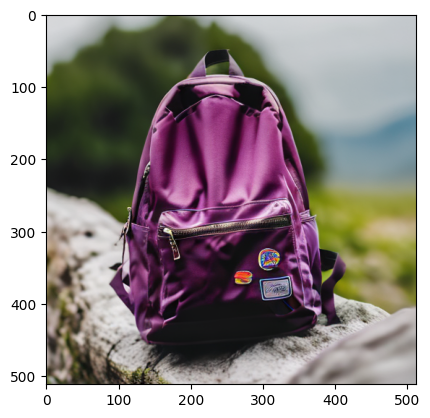

  0%|          | 0/50 [00:00<?, ?it/s]

22 a shiny backpack</w> backpack


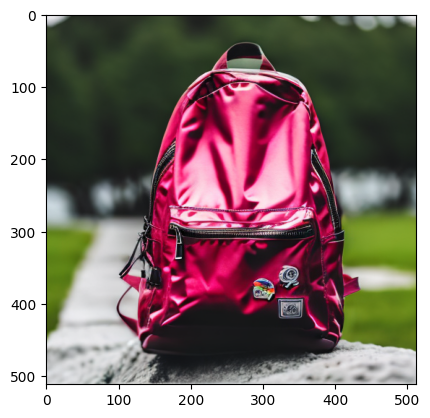

  0%|          | 0/50 [00:00<?, ?it/s]

23 a wet backpack</w> backpack


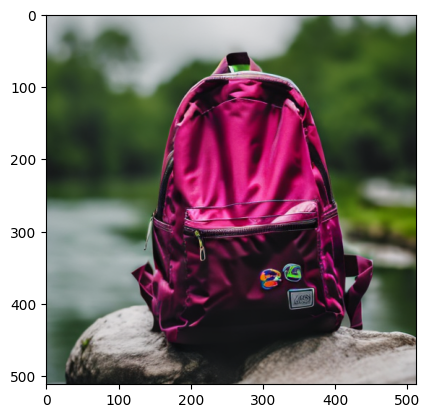

  0%|          | 0/50 [00:00<?, ?it/s]

24 a cube shaped backpack</w> backpack


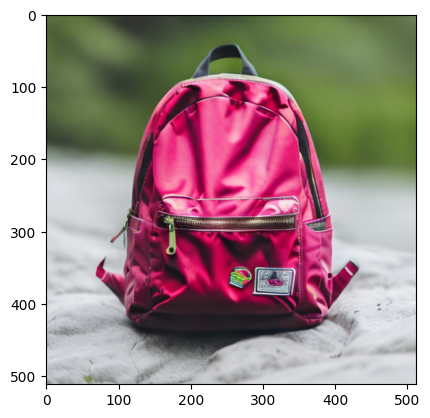

In [5]:
#seed 12, 16, 8, 9 
# seed = 2023
# torch.manual_seed(seed)
save_root = "./generated_pictures"
global_eta = 0.0
image_num = 4
save_dir = os.path.join(save_root, name, "global0.01disen0.001_step2900", str(global_eta))
os.makedirs(save_dir, exist_ok=True)

import matplotlib.pyplot as plt

for m in range(len(prompt_list)):
    prompt = prompt_list[m]
    image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=global_eta, img_adapter=adapter, step=50, num_images_per_prompt = image_num)
    print(m,prompt)
    plt.imshow(image[0])
    plt.show()
    for n in range(image_num):
        image[n].save(os.path.join(save_dir, str(m)+str(n)+".jpg"))

## Obtain the evaluation metrics
Choose the original data path and the generated path, and then you will obtain the corresponding metric

In [ ]:
origin_data_path = "/DATA/DATANAS1/chenhong/diffusion_research/dreambooth_data/" + name
generated_path = save_dir
# generated_path = "/DATA/DATANAS1/chenhong/diffusion_research/lora/disen_dreambooth/generated_pictures/red_cartoon/global0.01_disen0.001_step3000/0.0"
from evaluation import reconstruction_metric, text_img_match_metric 
clip_sim = reconstruction_metric(origin_data_path, generated_path, evalor)
DINO_sim = reconstruction_metric(origin_data_path, generated_path, evalor1)
image_text_similarity = text_img_match_metric(generated_path, evalor, unique_token=unique_token, class_token=class_token, mode=eval_mode, img_num_per_prompt=image_num)
print("clip image similarity:", clip_sim)
print("DINO image similarity:", DINO_sim)
print("image text similarity:", image_text_similarity)

## Generation optimization
If you are not satisfied with some of the generations, you can give the index and the new eta for better generation

In [7]:
# change_index = [3, 8, 9, 12, 19, 24]
# change_rate = [0.3, 0.2, 0.0, 0.1, 0.1, 0.3]
# for m in range( len(change_index) ):
#     eta_t = change_rate[m]
#     prompt = prompt_list[change_index[m]]
#     image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=eta_t, img_adapter=adapter, step=50, num_images_per_prompt = 4)
#     print(change_index[m],prompt)
#     plt.imshow(image[0])
#     plt.show()
#     for n in range(4):
#         image[n].save(os.path.join(save_dir, str(change_index[m])+str(n)+".jpg"))

## Metric calculation after the modification
You can calculate the new metric after you adjust the etas

In [8]:
# clip_sim = reconstruction_metric(origin_data_path, generated_path, evalor)
# DINO_sim = reconstruction_metric(origin_data_path, generated_path, evalor1)
# image_text_similarity = text_img_match_metric(generated_path, evalor, unique_token="", class_token=class_token, mode="object")
# print("clip image similarity:", clip_sim)
# print("DINO image similarity:", DINO_sim)
# print("image text similarity:", image_text_similarity)

In [9]:
# img1 = Image.open("/DATA/DATANAS1/zhangyip/SD_img2txt_prompt/training_scripts/generated_images/can/seed9/4.jpg" )
# img2 = Image.open("/DATA/DATANAS1/chenhong/diffusion_research/lora/disen_dreambooth/generated_pictures/can/global0.01_disen0.001_step3000/0.0/42.jpg")
# ref_img = Image.open("/DATA/DATANAS1/chenhong/diffusion_research/dreambooth_data/can/01.jpg")
# plt.imshow(img1)
# plt.show()
# plt.imshow(img2)
# plt.show()
# plt.imshow(ref_img)
# plt.show()
# # text = "a backpack_dog</w> backpack in the green jungle"
# sim1 = evalor.image_similarity(ref_img, img1).cpu().numpy() 
# sim2 = evalor.image_similarity(ref_img, img2).cpu().numpy() 
# print(sim1, sim2)